In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

%run utility_functions.py # functions reused throughout

-1    4849
 1    1001
Name: cleave, dtype: int64

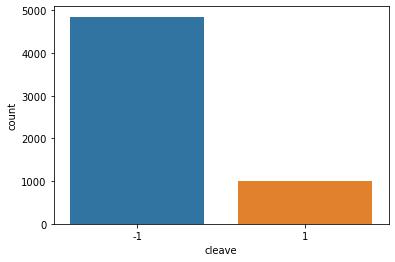

In [2]:
# Dataset source:
#http://archive.ics.uci.edu/ml/datasets/HIV-1+protease+cleavage#
# combined all datasets, removing duplicates

# Read in data
data = pd.read_csv('../data/HIV_DataSet.csv', sep=',')

sns.countplot(data['cleave']) # plot number of things with each value
# number of negative cleave values versus positive.
data['cleave'].value_counts(sort=True)
# skewed toward predicting negative because more examples?

In [3]:
# Create training, testing, and validation sets

X = data.drop('cleave', axis=1) # last value is the cleavage
y = data['cleave']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # 80/20 default

In [5]:
# reusing 'best' parameters from GridSearch for DT without boosting
# passing max_depth into the gridsearch
# smaller max_depth for boost. Tried 1 and 4, 1 was better by 2 %
dt = DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                       max_depth=1, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [50, 100, 200, 300, 400, 500],
              "learning_rate": [.01, .05, 1.0, 1.5, 2.0],
             }

# scorer for parameter combinations
acc_scorer = make_scorer(accuracy_score)

bdt = AdaBoostClassifier(dt, random_state=0)

grid_obj = GridSearchCV(bdt,parameters, scoring=acc_scorer, cv=10, n_jobs=4)
grid_obj = grid_obj.fit(x_train, y_train)

# Set clf to best combination of parameters
clf = grid_obj.best_estimator_


In [6]:
# train model
clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.001,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features='log2',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=5,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                      

No Skill: ROC AUC=0.500
Model: ROC AUC=0.972


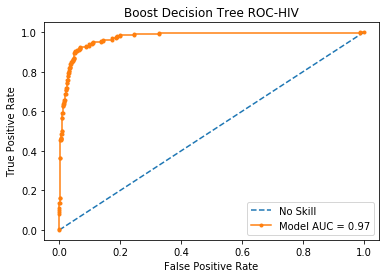

Model: f1=0.822 auc=0.895


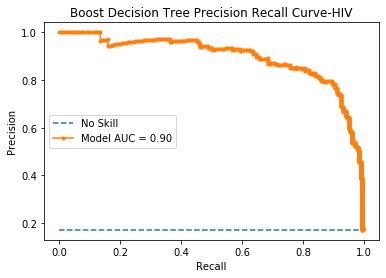

Classification Report
              precision    recall  f1-score   support

          -1       0.96      0.97      0.96       969
           1       0.84      0.81      0.82       201

    accuracy                           0.94      1170
   macro avg       0.90      0.89      0.89      1170
weighted avg       0.94      0.94      0.94      1170

Confusion Matrix
[[938  31]
 [ 39 162]]
Accuracy
0.9401709401709402
Balanced Accuracy
0.886989202593842


<module 'matplotlib.pyplot' from 'c:\\users\\spcbe\\miniconda3\\envs\\ml_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

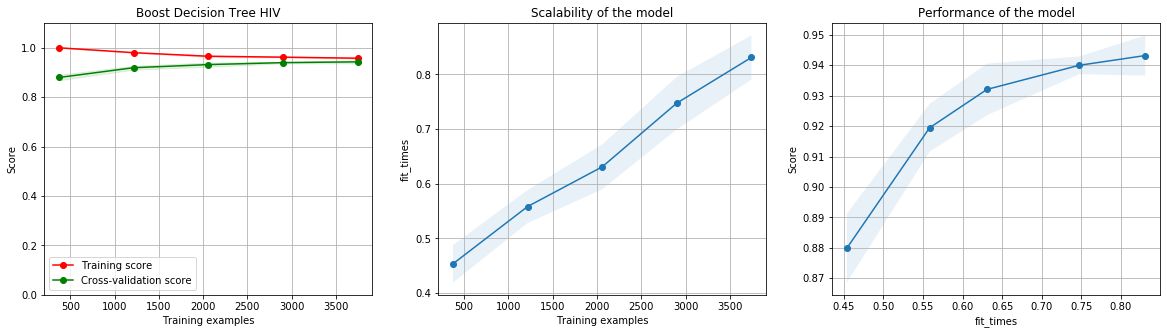

In [7]:
# test
y_predict = clf.predict(x_test)

# ROC
plot_roc(clf, x_test, y_test, y_predict, 'Boost Decision Tree ROC-HIV')
# Recall_precision_curve
plot_precision_recall_curve(clf, x_test, y_test, y_predict, 'Boost Decision Tree Precision Recall Curve-HIV')

# how did we do? Comparing y_test and predicted values
print('Classification Report')
print(classification_report(y_test, y_predict,zero_division=1))
print('Confusion Matrix')
# how to interpret: https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28
print(confusion_matrix(y_test, y_predict))
print('Accuracy')
print(accuracy_score(y_test, y_predict))

# for unbalanced data
print('Balanced Accuracy')
print(balanced_accuracy_score(y_test, y_predict))

# 1.1 so I can see the top of the plot
plot_learning_curve(clf, "Boost Decision Tree HIV", x_train, y_train, ylim=[0,1.1])

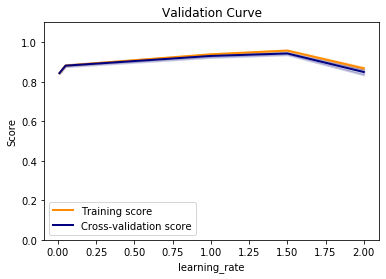

In [8]:
plot_model_complexity_analysis(clf, "learning_rate", [.01, .05, 1.0, 1.5, 2.0], 'Boost_HIV', x_train, y_train)

In [ ]:
plot_model_complexity_analysis(clf, "n_estimators", [50, 100, 200, 300, 400, 500], 'Boost_HIV', x_train, y_train)